
Starting Gradient Descent...
GD Parameters Found (on Scaled Data):
Slope (m_scaled): 104668.3415
Intercept (b_scaled): 372095.1325

--- Output 1) ---
Predicted price for a house with 2500 square feet:
$429,560.43

--- Output 2) ---
Generating plot of best fit line...


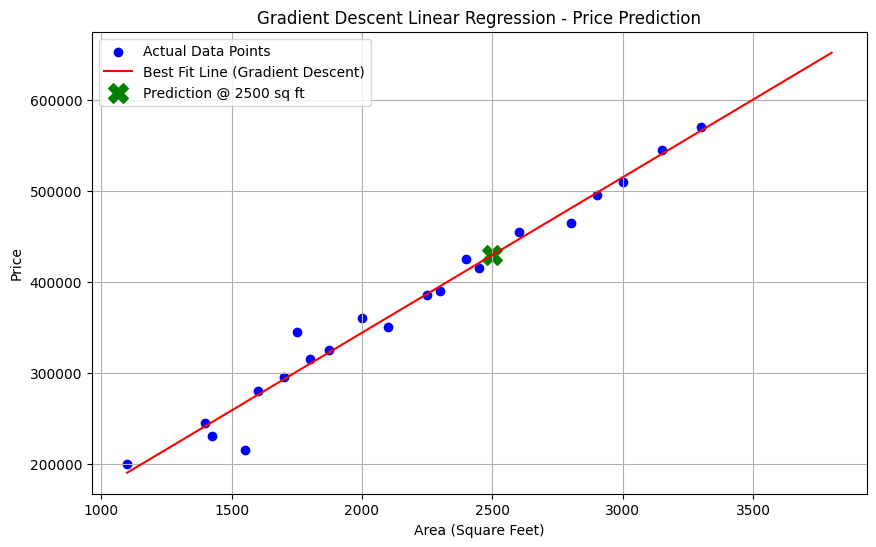

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def getdata():

    X = np.array([1100,1400,1425,1550,1600,1700,1750,1800,1875,2000,2100,2250,2300,2400,2450,2600,2800,2900,3000,3150,3300])
    Y = np.array([199000,245000,230000,215000,280000,295000,345000,315000,325000,360000,350000,385000,390000,425000,415000,455000,465000,495000,510000,545000,570000])

    return X, Y

def scale_features(X):

    mu = np.mean(X)
    sigma = np.std(X)
    X_scaled = (X - mu) / sigma
    return X_scaled, mu, sigma


def gradient_descent(X, Y, alpha=0.01, iterations=1500):

    n = len(X)

    m = 0.0
    b = 0.0

    cost_history = []

    for i in range(iterations):

        H = m * X + b
        error = H - Y

        m_gradient = (1 / n) * np.sum(error * X)

        b_gradient = (1 / n) * np.sum(error)

        m = m - alpha * m_gradient
        b = b - alpha * b_gradient

    return m, b, cost_history

def predict_gd(X_scaled_new, m, b, mu, sigma):

    X_scaled_new = (X_scaled_new - mu) / sigma

    return m * X_scaled_new + b


if __name__ == '__main__':

    LEARNING_RATE = 0.01
    N_ITERATIONS = 1500


    X, Y = getdata()

    X_scaled, mu_X, sigma_X = scale_features(X)

    print("\nStarting Gradient Descent...")

    m_scaled, b_scaled, _ = gradient_descent(X_scaled, Y, alpha=LEARNING_RATE, iterations=N_ITERATIONS)

    print("GD Parameters Found (on Scaled Data):")
    print(f"Slope (m_scaled): {m_scaled:.4f}")
    print(f"Intercept (b_scaled): {b_scaled:.4f}")

    target_area = 2500
    predicted_price = predict_gd(target_area, m_scaled, b_scaled, mu_X, sigma_X)

    print("\n--- Output 1) ---")
    print(f"Predicted price for a house with {target_area} square feet:")
    print(f"${predicted_price:,.2f}")


    print("\n--- Output 2) ---")
    print("Generating plot of best fit line...")


    X_line_original = np.linspace(X.min(), X.max() + 500, 100)


    Y_line = predict_gd(X_line_original, m_scaled, b_scaled, mu_X, sigma_X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, color='blue', label='Actual Data Points')
    plt.plot(X_line_original, Y_line, color='red', label='Best Fit Line (Gradient Descent)')


    plt.scatter(target_area, predicted_price, color='green', marker='X', s=200, label=f'Prediction @ 2500 sq ft')

    plt.title('Gradient Descent Linear Regression - Price Prediction')
    plt.xlabel('Area (Square Feet)')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()